# NAME- Venkata Sai Krishna Nivarthi
REG NO- 2028232

COURSE- BUSINESS ANALYTICS

SUBJECT- DATA ANALYSIS AND APPLICATION USING PYTHON

# CIA-2- MINI PROJECT- Exploratory data analysis and visualization on Customer purchase data(Marketing data)

Brief overview of the project- The marketing dataset is divided into 4p's i.e., Price, product, place and promotion. Here we are analyzing the customer purchases of different products within one company.The data set marketing_data.csv consists of 2,240 customers of XYZ company with data on:

Customer profiles

Product preferences

Campaign successes/failures

Channel performance


Objectives-
1) To find whether the dataset has null values and how can we impute those null values

2)To find whether the dataset has correct datatypes for the analysis or not, if not changing the datatypes and performing the analysis

3)To analyze how customer is spending on products using correlation and analyzing which type of customers are purchasing the products from which store

4)To analyze the customer data using cutomer profiles like Education, marital status, country with respect to income

5)To know which products are sold more and how much customers have spent on it

6)To know from which store the customers buying the products more

7)What factors are significantly related to the number of store purchases?

8)Which country spent most of the amount and total purchases from the store?


# Import libraries and reading the data

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing the data using pandas
df= pd.read_csv("marketing_data.csv")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,05-11-2014,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,04-08-2014,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [3]:
 '''DESCRIPTION OF THE VARIABLES-
DATA DICTIONARY

People

ID: Customer’s unique identifier
Year_Birth: Customer’s birth year
Education: Customer’s education level
Marital_Status: Customer’s marital status
Income: Customer’s yearly household income
Kidhome: Number of children in customer’s household
Teenhome: Number of teenagers in customer’s household
Dt_Customer: Date of customer’s enrollment with the company
Recency: Number of days since customer’s last purchase
Complain: 1 if customer complained in the last 2 years, 0 otherwise
Country: Customer’s location


Products

MntWines: Amount spent on wine in the last 2 years
MntFruits: Amount spent on fruits in the last 2 years
MntMeatProducts: Amount spent on meat in the last 2 years
MntFishProducts: Amount spent on fish in the last 2 years
MntSweetProducts: Amount spent on sweets in the last 2 years
MntGoldProds: Amount spent on gold in the last 2 years


Place

NumWebPurchases: Number of purchases made through the company’s web site
NumCatalogPurchases: Number of purchases made using a catalogue
NumStorePurchases: Number of purchases made directly in stores
NumWebVisitsMonth: Number of visits to company’s web site in the last month


Promotion

NumDealsPurchases: Number of purchases made with a discount
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise'''


'DESCRIPTION OF THE VARIABLES-\nDATA DICTIONARY\n\nPeople\n\nID: Customer’s unique identifier\nYear_Birth: Customer’s birth year\nEducation: Customer’s education level\nMarital_Status: Customer’s marital status\nIncome: Customer’s yearly household income\nKidhome: Number of children in customer’s household\nTeenhome: Number of teenagers in customer’s household\nDt_Customer: Date of customer’s enrollment with the company\nRecency: Number of days since customer’s last purchase\nComplain: 1 if customer complained in the last 2 years, 0 otherwise\nCountry: Customer’s location\n\n\nProducts\n\nMntWines: Amount spent on wine in the last 2 years\nMntFruits: Amount spent on fruits in the last 2 years\nMntMeatProducts: Amount spent on meat in the last 2 years\nMntFishProducts: Amount spent on fish in the last 2 years\nMntSweetProducts: Amount spent on sweets in the last 2 years\nMntGoldProds: Amount spent on gold in the last 2 years\n\n\nPlace\n\nNumWebPurchases: Number of purchases made throug

# Data Wrangling

In [4]:
df.shape
#We have 2240 rows with 28 variables in the dataset.

(2240, 28)

In [5]:
# Here the output shows the information of the dataset
df.info()
#We see that column_name "Income" has a space before it's name that will create problems in further analysis, so we'll rename it.

#There looks a problem with 2 column's datatypes. We need to change the datatype of "Income" column into int64 so that it can be used for further calculations 
#and change the datatype of "Dt_Customer" into datetime.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              1940 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [6]:
#We see that column_name "Income" has a space before it's name that will create problems in further analysis, so we'll rename itdf.rename(columns={' Income ':'Income'},inplace=True)
df.rename(columns={' Income ':'Income'},inplace=True)

In [7]:
#The date, month, year datatype is given as object, changing into datetime.
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"]) 
#Here there is $ dollar symbol and comma(,), we are removing it. as the datatype will be float
df["Income"] = df["Income"].str.replace("$","").str.replace(",","") 
#The income variable is changed to float datatype
df["Income"] = df["Income"].astype(float)

In [8]:
df.head()
#Here we can see that the dollar symbol is removed

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [9]:
df.info()
#We can see the dt_customer changed to datetime datatype and income changesd to float datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               1940 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [10]:
df.nunique()
#We have data of 2240 unique Customers. No customer ID is repeated in the data.

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1750
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Response                  2
Complain                  2
Country                   8
dtype: int64

In [11]:
# Removing unnecessary column
# We dont need column like ID
df.drop(['ID'],axis=1,inplace =True)

In [12]:
#checking for duplicate values
df.duplicated().sum()
#we have 40 duplicated values in the dataset

40

In [13]:
#Dropping the duplicates because it will create no accurate output
df= df.drop_duplicates() 

In [14]:
df.shape
#no duplicates present in the data, total rows are 2200

(2200, 27)

# Handle missing values

In [15]:
df.isnull().sum()

Year_Birth               0
Education                0
Marital_Status           0
Income                 299
Kidhome                  0
Teenhome                 0
Dt_Customer              0
Recency                  0
MntWines                 0
MntFruits                0
MntMeatProducts          0
MntFishProducts          0
MntSweetProducts         0
MntGoldProds             0
NumDealsPurchases        0
NumWebPurchases          0
NumCatalogPurchases      0
NumStorePurchases        0
NumWebVisitsMonth        0
AcceptedCmp3             0
AcceptedCmp4             0
AcceptedCmp5             0
AcceptedCmp1             0
AcceptedCmp2             0
Response                 0
Complain                 0
Country                  0
dtype: int64

'We can see that the distribution is rightly skewed. \nIt has outliers towards the right and so, mean will not be a good imputation method as mean is sensitive to outliers.\nwe need to take median as imputation.'

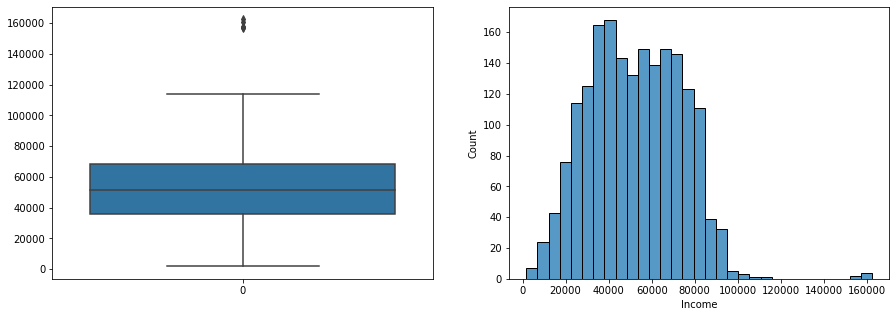

In [16]:
#To check the skewness, let us plot the boxplot and histogram.
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data = df["Income"])
plt.subplot(1,2,2)
sns.histplot(df["Income"])


'''We can see that the distribution is rightly skewed. 
It has outliers towards the right and so, mean will not be a good imputation method as mean is sensitive to outliers.
we need to take median as imputation.'''

In [17]:
df["Income"].fillna(value=df["Income"].median(),inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2200 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2200 non-null   int64         
 1   Education            2200 non-null   object        
 2   Marital_Status       2200 non-null   object        
 3   Income               2200 non-null   float64       
 4   Kidhome              2200 non-null   int64         
 5   Teenhome             2200 non-null   int64         
 6   Dt_Customer          2200 non-null   datetime64[ns]
 7   Recency              2200 non-null   int64         
 8   MntWines             2200 non-null   int64         
 9   MntFruits            2200 non-null   int64         
 10  MntMeatProducts      2200 non-null   int64         
 11  MntFishProducts      2200 non-null   int64         
 12  MntSweetProducts     2200 non-null   int64         
 13  MntGoldProds         2200 non-nul

# dividing the dataset into 3 parts for better visualization

In [19]:
df_cat = df.loc[:,df.dtypes==np.object]
#For categorical variables

In [20]:
df_cat.head() #Only 3 categorical variables are present in the data

,Education,Marital_Status,Country
0,Graduation,Divorced,SP
1,Graduation,Single,CA
2,Graduation,Married,US
3,Graduation,Together,AUS
4,Graduation,Single,SP


In [21]:
df_cat.shape

(2200, 3)

In [22]:
cat_num = ['Kidhome', 'Teenhome', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain']

df_cat_num = df[cat_num] #Converting into dataframe

#Ordinal scale data, there are 9 columns taken under one dataset

In [23]:
df_cat_num['Kidhome'].value_counts()
#We see that many of the customers doesnt have any child
#881 customers have single child
#47 customers have 2 children

0    1272
1     881
2      47
Name: Kidhome, dtype: int64

In [24]:
df_cat['Marital_Status'].value_counts()
#Here we can see that more number of customers are married
#473 customers are single and 227 are divorced

Married     849
Together    570
Single      473
Divorced    227
Widow        74
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [25]:
num = ['Year_Birth','Income','Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
df_num = df[num] #Converting into dataframe

#Continous scale data(creating new dataframe)

In [26]:
df_num.head()

,Year_Birth,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,1970,84835.0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1
1,1961,57091.0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5
2,1958,67267.0,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2
3,1967,32474.0,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7
4,1989,21474.0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7


# Analysis Numerical Continuous variable

In [27]:
df_num.describe()
#Checking the scale data statistical outputs like mean, minimum and maximum value for better understanding and visualization

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,1968.792727,52069.397727,49.159091,304.251818,26.278182,167.569545,37.487727,27.123182,44.194091,2.325455,4.096818,2.665000,5.789091,5.315909
std,12.007832,19990.256975,28.982426,336.273927,39.647789,226.537854,54.632826,41.320901,52.321565,1.928812,2.784546,2.923467,3.250923,2.425370
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,37783.750000,24.000000,23.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000
50%,1970.000000,51563.000000,49.000000,175.500000,8.000000,68.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000
75%,1977.000000,65815.250000,74.000000,505.000000,33.000000,232.000000,50.000000,34.000000,56.250000,3.000000,6.000000,4.000000,8.000000,7.000000
max,1996.000000,162397.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000


In [28]:
df_num.head()

,Year_Birth,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,1970,84835.0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1
1,1961,57091.0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5
2,1958,67267.0,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2
3,1967,32474.0,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7
4,1989,21474.0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7


In [29]:
#The date enrollement of the customer to the company is not required for the furthur analysis, we are dropping it here.
df_num = df_num.drop(['Dt_Customer'],axis=1)

# Outlier removal

In [30]:
df_num.columns

Index(['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'],
      dtype='object')

In [31]:
df_num.shape

(2200, 14)

<AxesSubplot:>

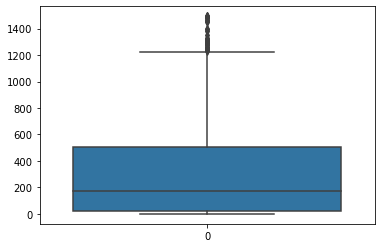

In [32]:
#check if there are any outliers present in the Mntwines.
sns.boxplot(data = df_num['MntWines'])
#We are not removing the outliers as the data will be reduced 
#and we need not to remove this variables as amount as can be increased to any level

<AxesSubplot:>

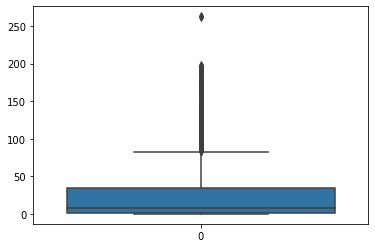

In [33]:
sns.boxplot(data = df_num['MntSweetProducts'])
#We are not removing the outliers as the data will be reduced and we need not to remove this variables as amount as can be increased to any level

<AxesSubplot:>

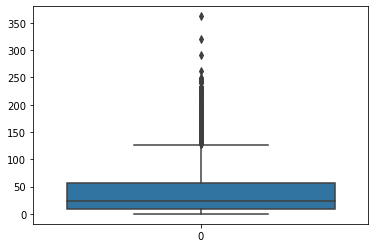

In [34]:
sns.boxplot(data = df_num['MntGoldProds'])
#We are not removing the outliers as the data will be reduced and we need not to remove this variables as amount as can be increased to any level

<AxesSubplot:>

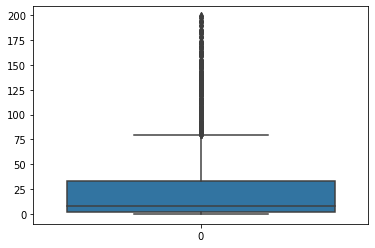

In [35]:
sns.boxplot(data = df_num['MntFruits'])
#We are not removing the outliers as the data will be reduced and we need not to remove this variables as amount as can be increased to any level

<AxesSubplot:>

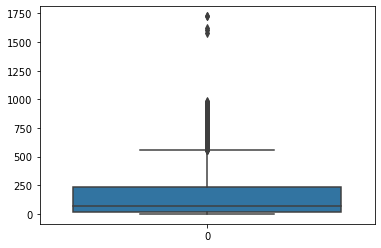

In [36]:
sns.boxplot(data = df_num['MntMeatProducts'])
#We are not removing the outliers as the data will be reduced and we need not to remove this variables as amount as can be increased to any level

<AxesSubplot:>

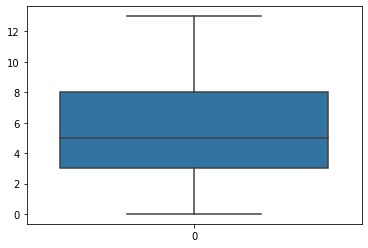

In [37]:
sns.boxplot(data = df_num['NumStorePurchases'])

<AxesSubplot:>

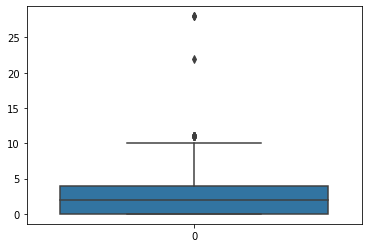

In [38]:
sns.boxplot(data = df_num['NumCatalogPurchases'])

<AxesSubplot:>

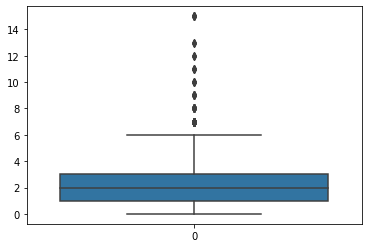

In [39]:
sns.boxplot(data = df_num['NumDealsPurchases'])

<AxesSubplot:>

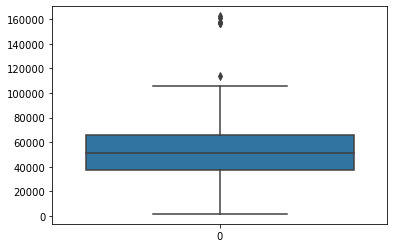

In [40]:
sns.boxplot(data = df_num['Income'])

"We need to remove it as it's not possible for a customer \nto have birth year less than 1900 and it maybe inappropriate in my view"

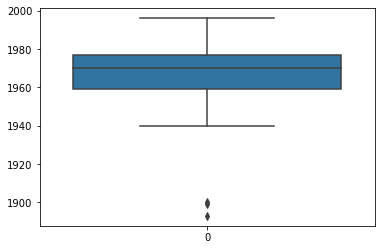

In [41]:
sns.boxplot(data = df_num['Year_Birth'])
'''We need to remove it as it's not possible for a customer 
to have birth year less than 1900 and it maybe inappropriate in my view'''

<AxesSubplot:>

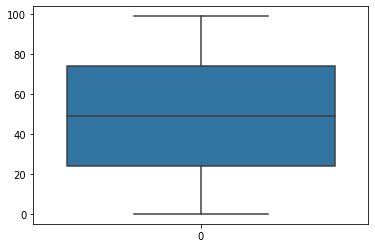

In [42]:
sns.boxplot(data = df_num['Recency'])

In [43]:
#Replacing these values with fillting values
df_num['Year_Birth']= df_num['Year_Birth'].replace({1899:1999})
df_num['Year_Birth']= df_num['Year_Birth'].replace({1900:1967})
df_num['Year_Birth']= df_num['Year_Birth'].replace({1893:1993})

<AxesSubplot:>

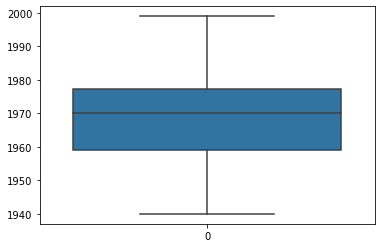

In [44]:
sns.boxplot(data = df_num['Year_Birth'])

In [45]:
df_num.shape

(2200, 14)

# Histogram

<Figure size 720x360 with 0 Axes>

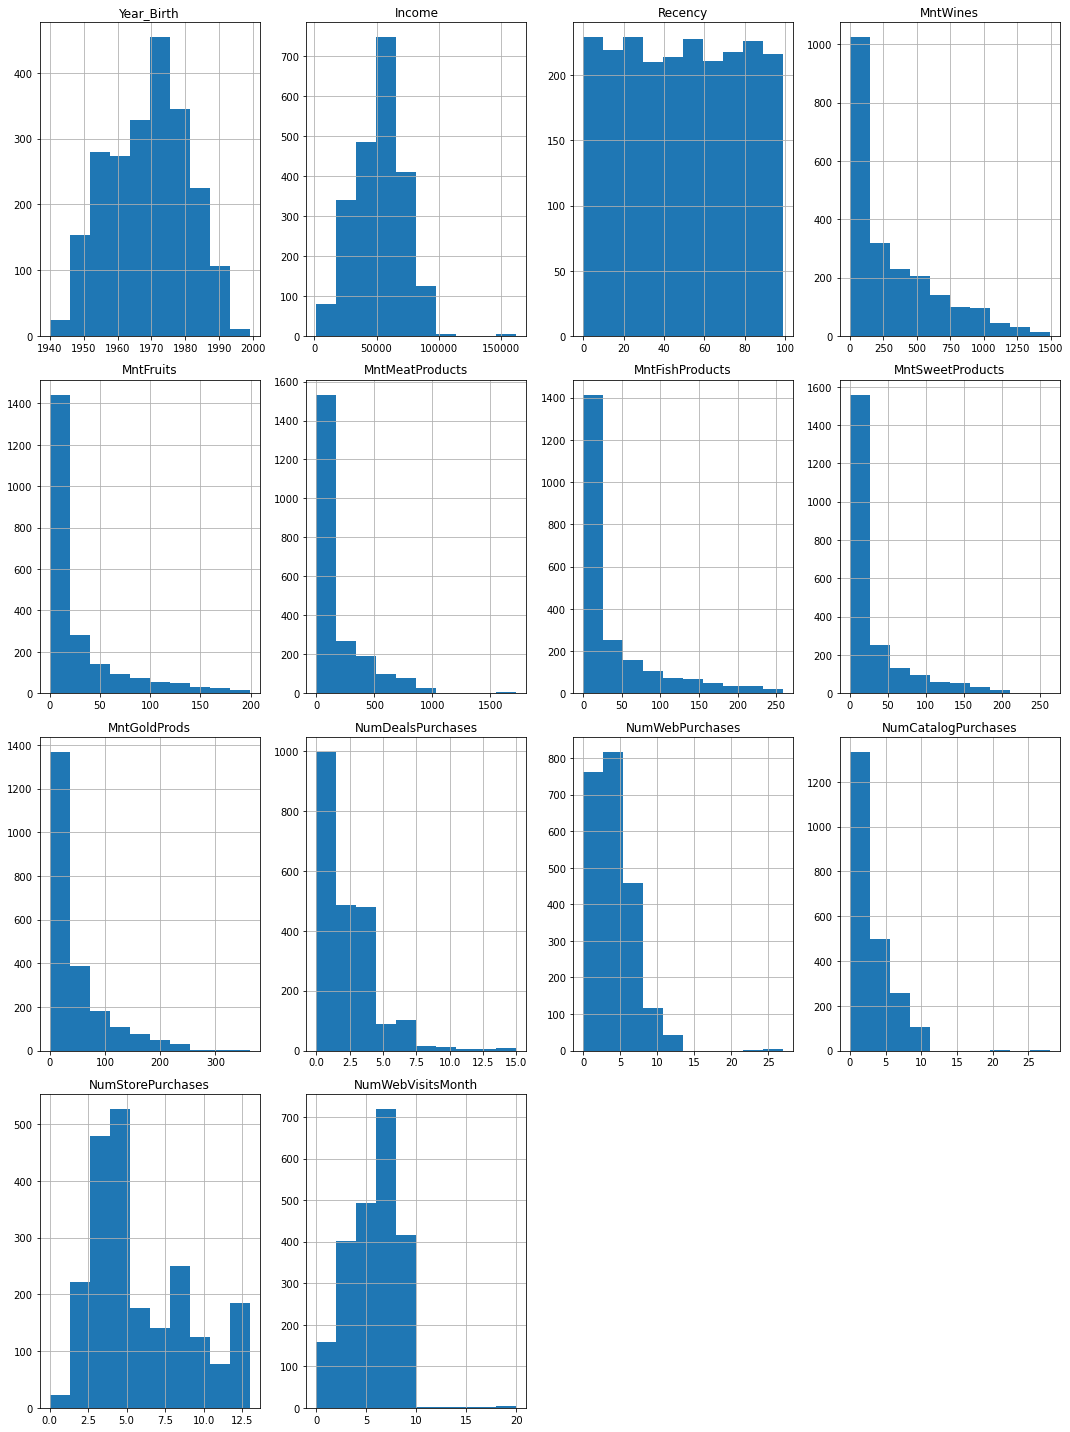

In [46]:
#Plotting the histogram to understand the data about different variables of scale data
plt.figure(figsize=(10,5))
df_num.hist(figsize = (15,20))
plt.tight_layout()

C:\Users\VENKATA SAI\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

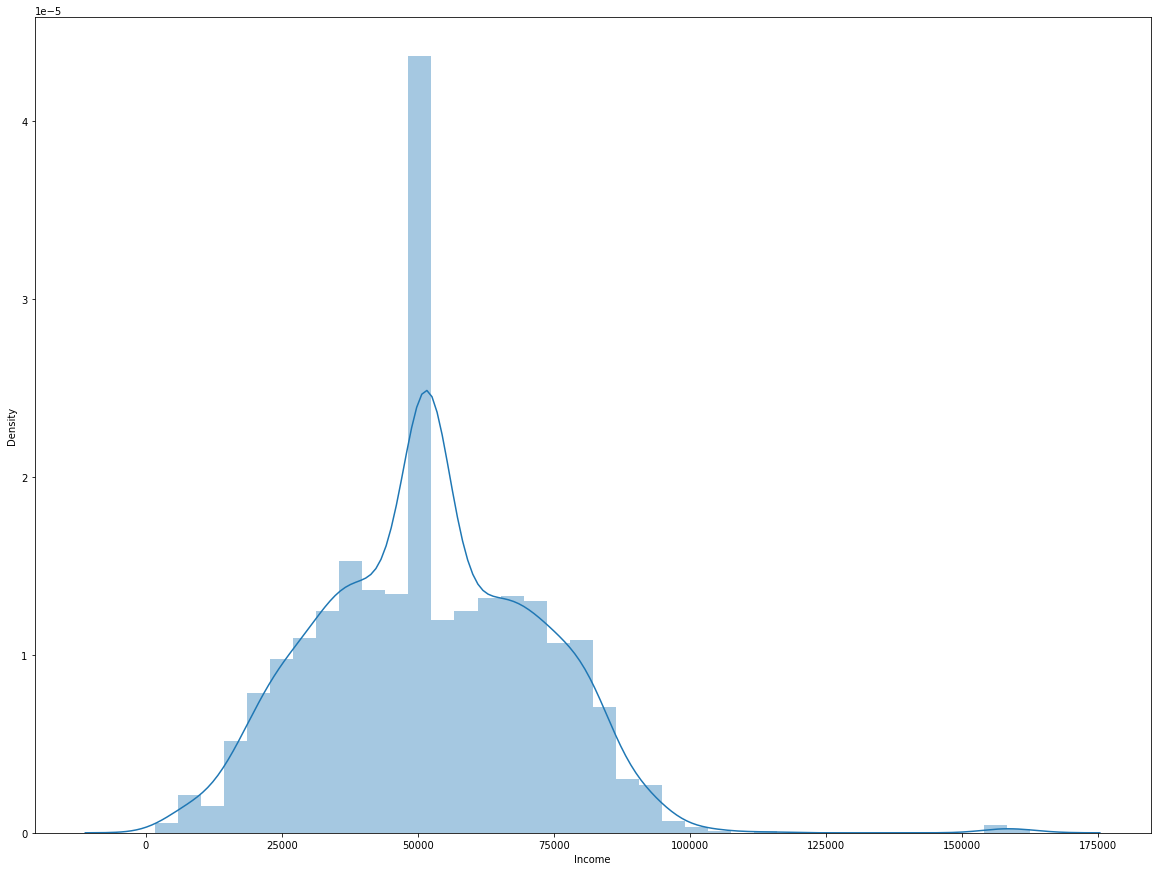

In [47]:
plt.figure(figsize=(20,15))
sns.distplot(df["Income"])

'''We have a varied range of Customers in this store. People with income as high as 175k yearly income and some customers with less than 100k yearly income as well.

However, majority of customers are with low yearly income and there are only a few which have income more than 100k. This means that the store caters to majorly low-income group customers and doesn't entertain rich/luxury customers.

So, we will remove this outliers otherwise it will pose a problem in further analysis. We use the log transformation technqiue for this.'''

In [48]:
df["Income"] = np.log(df["Income"])
'''the log operation had a dual role:

Reducing the impact of too-low values
Reducing the impact of too-high values.'''

'the log operation had a dual role:\n\nReducing the impact of too-low values\nReducing the impact of too-high values.'

C:\Users\VENKATA SAI\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

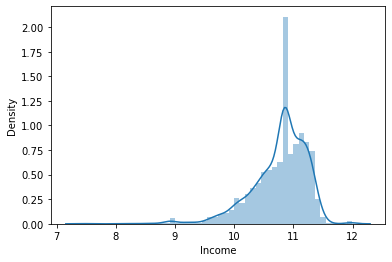

In [49]:
sns.distplot(df["Income"])

<AxesSubplot:>

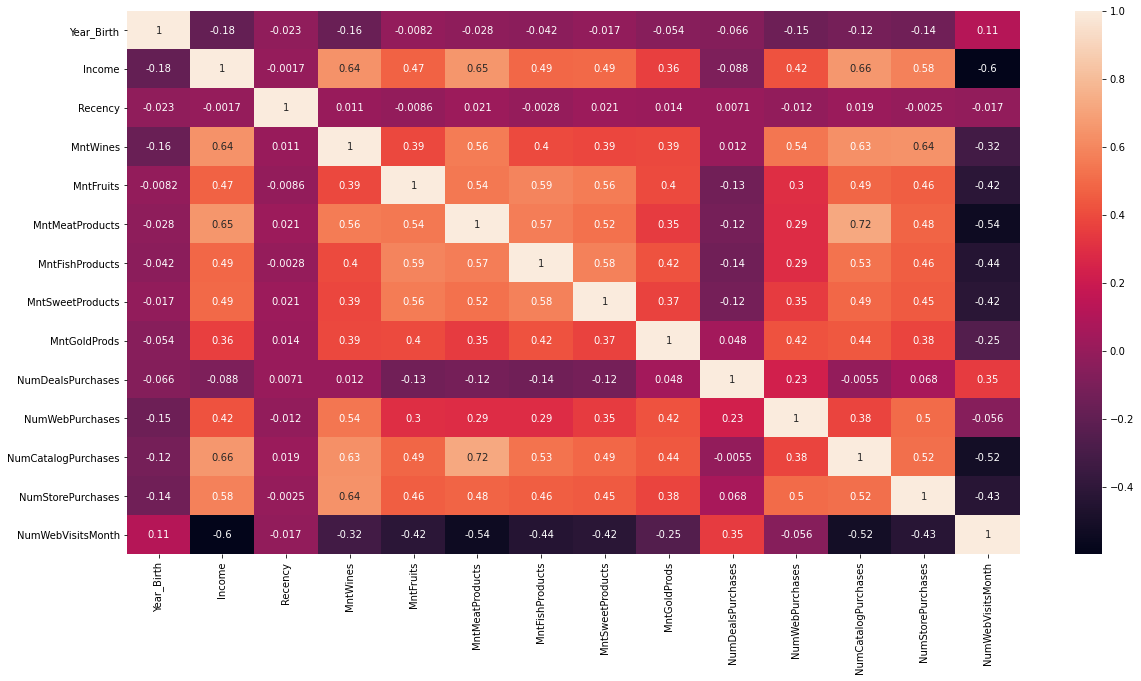

In [50]:
#Correlation
plt.figure(figsize=(20,10))
sns.heatmap(df_num.corr(),annot=True)

'Income has a high positive correlation with "NumPurchases" columns and "Mnt" columns. This represents the High Income cluster and shows people with high income spend more and purchase more frequently. Income has a high negative correlation with "NumWebVisitsMonth" suggesting that customers with high income do not for web visits too often.

"Amount Spent on Wines" has a high positive correlation with "NumCatalogPurchases" and "NumStorePurchases", and similarly, "Amount Spent on Meat products" has a very high positive correlation with "NumCatalogPurchases", suggesting that People generally buy Wines and Meat products through Catalogs.

"NumWebVisitsMonth" shows no correlation with "NumWebPurchases". Instead, it shows a mild correlation with "NumDealsPurchases" which suggests that deals are an effective way of stimulating purchases on the website.''

# Analysis of each categorical column

C:\Users\VENKATA SAI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

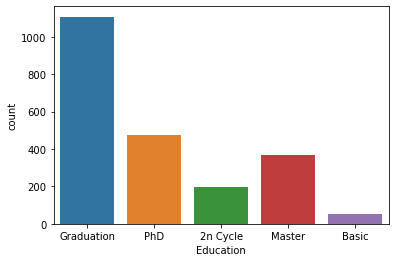

In [51]:
sns.countplot(df["Education"])

Second cycle corresponds to graduate level or master's level studies. Third cycle corresponds to doctoral or PhD level studies. This type of education system is usally accepted in European countries.

Insight: So we have maximum customers who have completed their Graduation, and only a few of them have gone to study further after Graduation.

<AxesSubplot:xlabel='Education', ylabel='Income'>

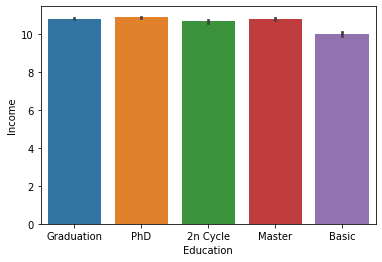

In [52]:
sns.barplot(x=df["Education"],y=df["Income"])

This is barplot wih x-axis as "Education" and y-axis "Income".

Insight: Customers with PhD degree have highest average income as compared to other customers.

C:\Users\VENKATA SAI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

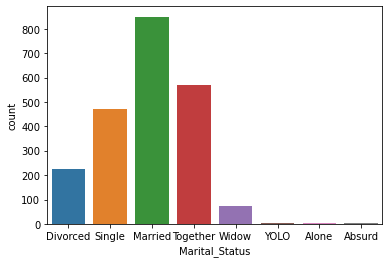

In [53]:
sns.countplot(df["Marital_Status"])

Number of married customers are the more for this store.

With the help of client, you can have a better understanding of the data and clean this type of data. Like you can merge the YOLO, Alone and Single categories together.

But merging and the domain knowledge is important.

C:\Users\VENKATA SAI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Country', ylabel='count'>

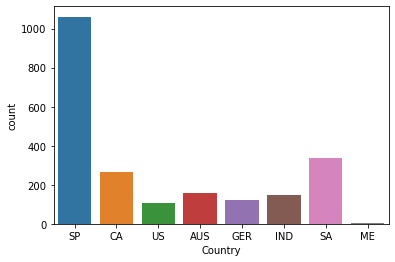

In [54]:
sns.countplot(df["Country"])

1) Spain has maximum customers.
2) Mean birth year for all countries is approximately the same.
3) Average Income of customers of all countries is approximately the same.

# Products

In [55]:
#Grouping all the product with respect to the amounts that customers has spent
Products = [col for col in df.columns if 'Mnt' in col] #if mnt in column it will be stored in the col
Products_total = []  #empty list
for i in range(0,6):
    print("{} = {}".format(Products[i],df[Products[i]].sum(axis=0))) #key= products[i], values=df[Products[i]]
    Products_total.append(df[Products[i]].sum(axis=0))

MntWines = 669354
MntFruits = 57812
MntMeatProducts = 368653
MntFishProducts = 82473
MntSweetProducts = 59671
MntGoldProds = 97227


<AxesSubplot:>

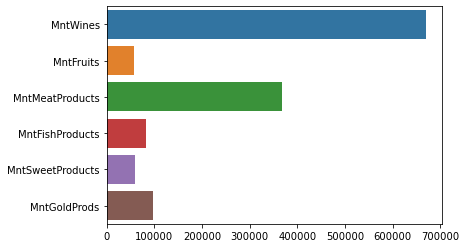

In [56]:
sns.barplot(x=Products_total, y=Products)

This clearly shows Maximum Amount is spent on Wines, so it is most favorite product of all customers. The next favourite product is Meat Products.

# Purchases

In [57]:
#Grouping all the purchases with respect to the the customer where he purchased
Purchases = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'] 
Purchases_total = []
for i in range(0,4):
    print("{} = {}".format(Purchases[i],df[Purchases[i]].sum(axis=0)))
    Purchases_total.append(df[Purchases[i]].sum(axis=0))

#More purchases are from store and then web

NumDealsPurchases = 5116
NumWebPurchases = 9013
NumCatalogPurchases = 5863
NumStorePurchases = 12736


<AxesSubplot:>

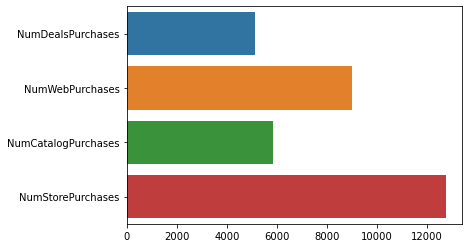

In [58]:
sns.barplot(x=Purchases_total, y=Purchases)

This shows that maximum purchases have been done through store visits and the next is through website.

# Ordinal data, categorical numerical

C:\Users\VENKATA SAI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Complain', ylabel='count'>

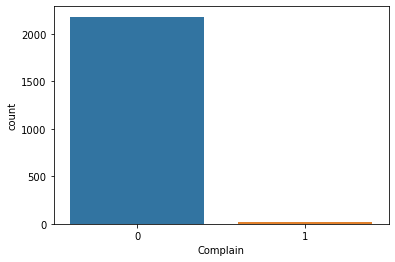

In [59]:
sns.countplot(df["Complain"])

Very few complaints have been made by the customers. Majority of people did not have any complaints. So the company can focus on people who had filed complaints and resolve those to have a no complaint record.

C:\Users\VENKATA SAI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AcceptedCmp1', ylabel='count'>

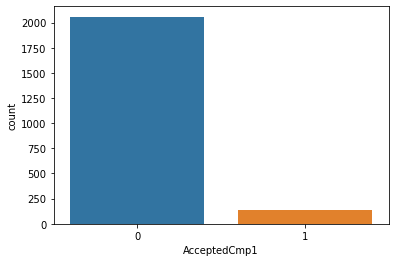

In [60]:
sns.countplot(df["AcceptedCmp1"])

1 if customer accepted the offer in the 1st campaign, 0 otherwise 

The most of the customers did not accept the offer in 1st campaign

C:\Users\VENKATA SAI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AcceptedCmp2', ylabel='count'>

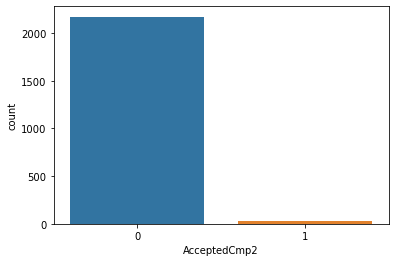

In [61]:
sns.countplot(df["AcceptedCmp2"])

1 if customer accepted the offer in the 2nd campaign, 0 otherwise 

The most of the customers did not accept the offer in 2nd campaign

C:\Users\VENKATA SAI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AcceptedCmp3', ylabel='count'>

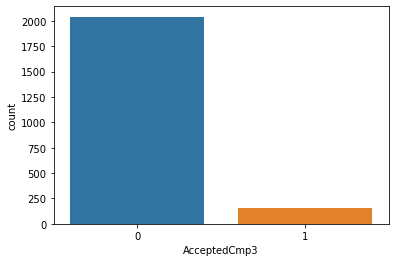

In [62]:
sns.countplot(df["AcceptedCmp3"])

1 if customer accepted the offer in the 3rd campaign, 0 otherwise 

The most of the customers did not accept the offer in 3rd campaign, but compared to 2nd campaign the customers started accepting the offers

C:\Users\VENKATA SAI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AcceptedCmp4', ylabel='count'>

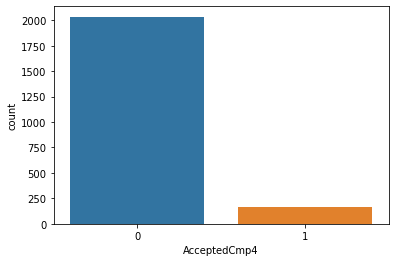

In [63]:
sns.countplot(df["AcceptedCmp4"])

1 if customer accepted the offer in the 4th campaign, 0 otherwise 

The most of the customers did not accept the offer in 4th campaign

C:\Users\VENKATA SAI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AcceptedCmp5', ylabel='count'>

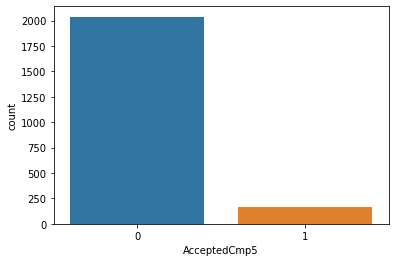

In [64]:
sns.countplot(df["AcceptedCmp5"])

1 if customer accepted the offer in the 5th campaign, 0 otherwise 

The most of the customers did not accept the offer in 5th campaign

From 3rd campaigh the customers accepting offers are same, no change in that

C:\Users\VENKATA SAI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Response', ylabel='count'>

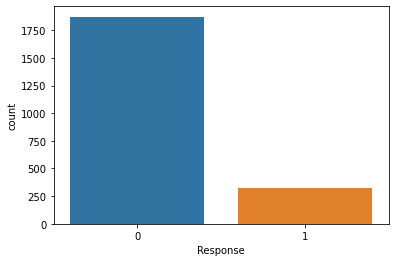

In [65]:
sns.countplot(df["Response"])

In last campaign

# Kidhome + teenhome

In [66]:
#Creating new data frame with amount spend and purchases made
df2 = df.copy()
df2["AmountSpent"] = df[Products].sum(axis=1)
df2["PurchasesMade"] = df[Purchases].sum(axis=1)

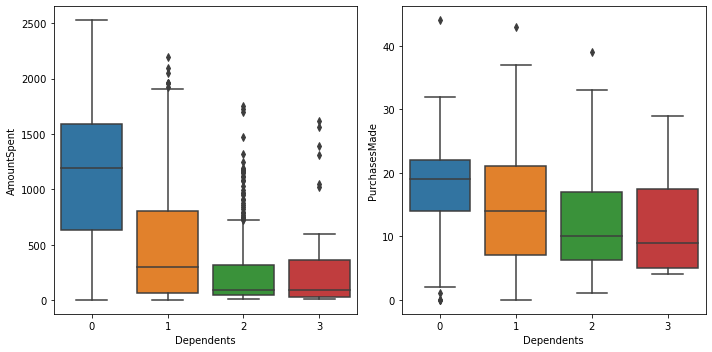

In [67]:
#Taking kidhome and teenhome as dependents column
df2["Dependents"] = df2["Kidhome"] + df2["Teenhome"]

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(y=df2["AmountSpent"],x=df2["Dependents"])
plt.subplot(1,2,2)
sns.boxplot(y=df2["PurchasesMade"],x=df2["Dependents"])
plt.tight_layout()

This shows that customers with more dependents spend less, as compared to customers with less dependents. Also, customers with more dependents make less number of purchases in the store.

In [68]:
#If we subtract date customer associated with the company with year birth, we get age of the customer
df2["Age"] = pd.datetime.today().year - df["Year_Birth"]

<ipython-input-68-a93d7b391ed2>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  df2["Age"] = pd.datetime.today().year - df["Year_Birth"]


In [69]:
df2["Age_category"] = df2['Age'].apply(lambda x: 'Senior Citizen' if x >= 60 else 'Adult' if x > 25 else 'Youth')

<AxesSubplot:xlabel='Age_category', ylabel='count'>

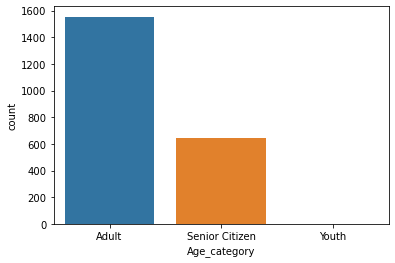

In [70]:
sns.countplot(x=df2["Age_category"])

So we have most of the customers in the age group 25 to 60.

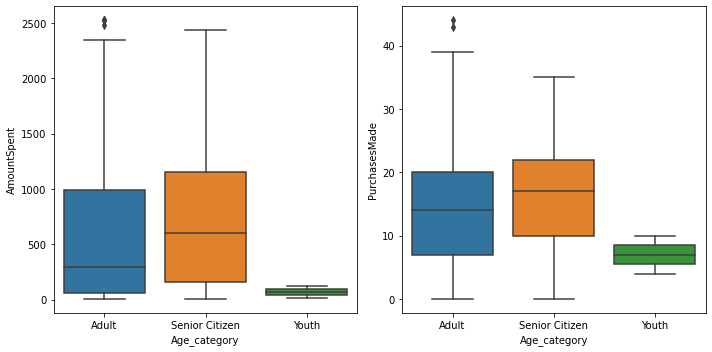

In [71]:
#Analyzing the amount spent and purchases made with respect to age
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(y=df2["AmountSpent"],x=df2["Age_category"])
plt.subplot(1,2,2)
sns.boxplot(y=df2["PurchasesMade"],x=df2["Age_category"])
plt.tight_layout()

Surprisingly, Senior citizens are making more puchases and spending more as compared to Adults.

# What factors are significantly related to the number of store purchases?

In [72]:
df_num.corrwith(df_num.NumStorePurchases).sort_values()

NumWebVisitsMonth     -0.428090
Year_Birth            -0.140811
Recency               -0.002525
NumDealsPurchases      0.067738
MntGoldProds           0.381496
MntSweetProducts       0.448229
MntFishProducts        0.457523
MntFruits              0.460793
MntMeatProducts        0.478292
NumWebPurchases        0.501450
NumCatalogPurchases    0.515931
Income                 0.580548
MntWines               0.639270
NumStorePurchases      1.000000
dtype: float64

As we can see number of store purchases are highly correlated to amount of wines purchased. So we can conclude that may be wines are purchased more of the time from store

Insight: NumStorePurchases decrease with the increase in NumWebVisitsMonth. Also, NumStorePurchases increases with the mAmount spent on wines and NumCatalogPurchases.

# Which country spent most of the amount and total purchases in store?

In [73]:
df["AmountSpent"] = df[Products].sum(axis=1)
df["PurchasesMade"] = df[Purchases].sum(axis=1)

In [74]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,AmountSpent,PurchasesMade
0,1970,Graduation,Divorced,11.348463,0,0,2014-06-16,0,189,104,...,0,0,0,0,0,1,0,SP,1190,15
1,1961,Graduation,Single,10.952402,0,0,2014-06-15,0,464,5,...,0,0,0,0,1,1,0,CA,577,18
2,1958,Graduation,Married,11.116425,0,1,2014-05-13,0,134,11,...,0,0,0,0,0,0,0,US,251,11
3,1967,Graduation,Together,10.388195,1,1,2014-05-11,0,10,0,...,0,0,0,0,0,0,0,AUS,11,4
4,1989,Graduation,Single,9.974598,1,0,2014-04-08,0,6,16,...,1,0,0,0,0,1,0,SP,91,8


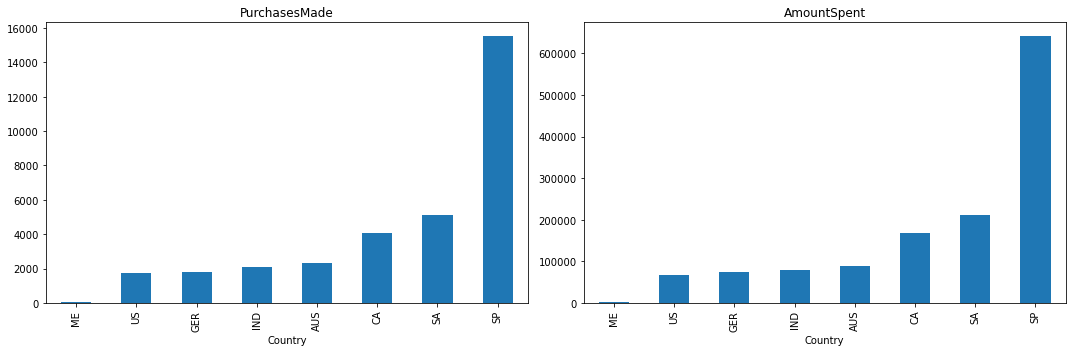

In [75]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df.groupby('Country')["PurchasesMade"].sum().sort_values().plot(kind='bar')
plt.title("PurchasesMade")
plt.subplot(1,2,2)
df.groupby('Country')["AmountSpent"].sum().sort_values().plot(kind='bar')
plt.title("AmountSpent")
plt.tight_layout()

Although it is too evident from the visualisation that Spain is the best in terms of Total Amount Spent and Total Purchases made in the store, but for a better analysis.

Text(0, 0.5, 'MntWines')

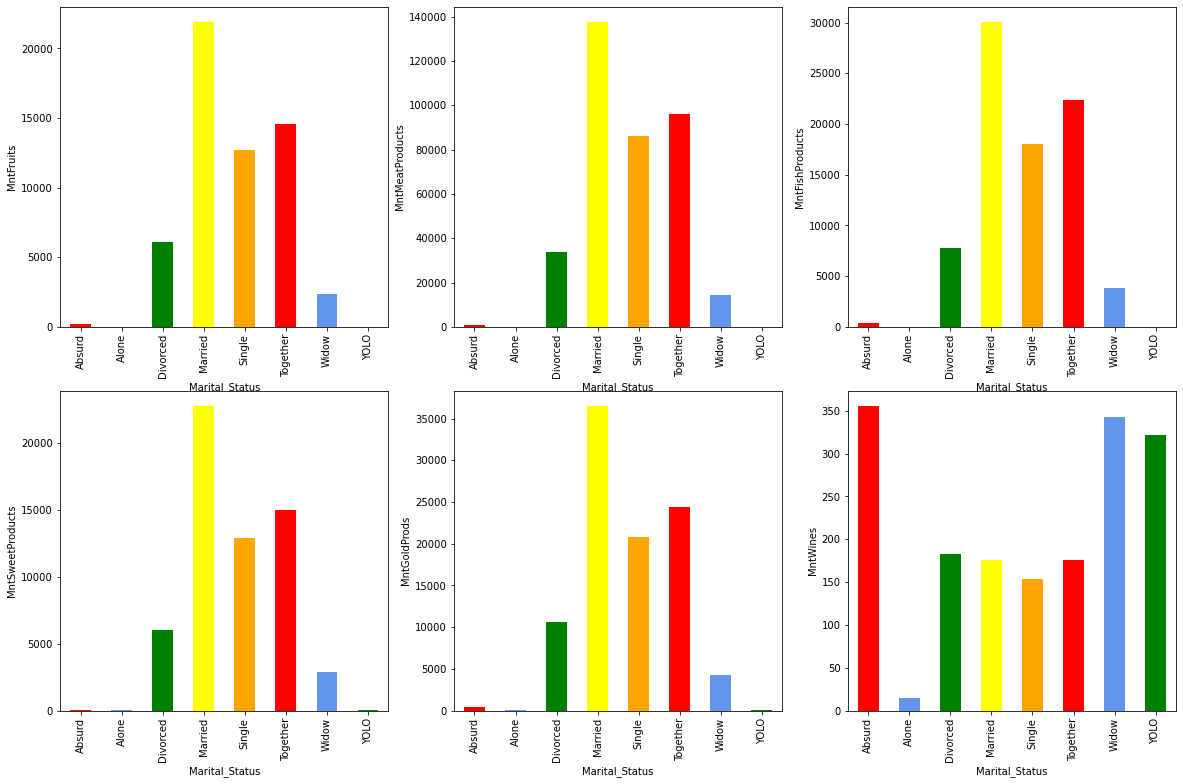

In [76]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
data1=df.copy()
data1.groupby('Marital_Status')['MntFruits'].sum().plot.bar(color= ['red','cornflowerblue','green','yellow','orange'])
plt.xlabel('Marital_Status')
plt.ylabel('MntFruits')

plt.subplot(3,3,2)
data1=df.copy()
data1.groupby('Marital_Status')['MntMeatProducts'].sum().plot.bar(color= ['red','cornflowerblue','green','yellow','orange'])
plt.xlabel('Marital_Status')
plt.ylabel('MntMeatProducts')

plt.subplot(3,3,3)
data1=df.copy()
data1.groupby('Marital_Status')['MntFishProducts'].sum().plot.bar(color= ['red','cornflowerblue','green','yellow','orange'])
plt.xlabel('Marital_Status')
plt.ylabel('MntFishProducts')

plt.subplot(3,3,4)
data1=df.copy()
data1.groupby('Marital_Status')['MntSweetProducts'].sum().plot.bar(color= ['red','cornflowerblue','green','yellow','orange'])
plt.xlabel('Marital_Status')
plt.ylabel('MntSweetProducts')

plt.subplot(3,3,5)
data1=df.copy()
data1.groupby('Marital_Status')['MntGoldProds'].sum().plot.bar(color= ['red','cornflowerblue','green','yellow','orange'])
plt.xlabel('Marital_Status')
plt.ylabel('MntGoldProds')

plt.subplot(3,3,6)
data1=df.copy()
data1.groupby('Marital_Status')['MntWines'].median().plot.bar(color= ['red','cornflowerblue','green','yellow','orange'])
plt.xlabel('Marital_Status')
plt.ylabel('MntWines')


# Recommendations


1) Customers prefer the stores to purchase the products to meet the demand; the company has to maintain sufficient inventory inventories and employees

2) The company need to promote the products using different social media platofrms, as many of them are engaging there, these days and after offering disounts, customers purchases are less, it maybe because lo awareness, so company need to promote more.

3) Customers with PhD degree have highest average income as compared to other customers. so costly products can be targeted on these customers.

4) Number of married customers are the more for this store. so introducing new products related to couples will gain revenue. Though there are more sales from married customers, the company has to attract other customers to improve its customer base

5)Most of the customers are preferring wines and meat from this company so the company can introduce different types lo liquor to get more revenue.Other products like sweets, fishproducts are sold less, so they can reduce the inventory to avoid wastage.

6)Spain is the best in terms of Total Amount Spent and Total Purchases made in the store, more revenue is generated from spain, so comapny can open new store in that country.

7)The company has to develop more innovative campaigns and reach out to the customers because many customers don’t have impacted campaigns in their purchases

8)The company has to conduct its campaigns more in the countries like Mexico, where there are fewer sales

9)The company has to target educated customers primarily followed by the other to improve their sales and revenue.




# Conclusion

This EDA and visualization will help the company to know their effective customers. This will help them to improve their innovative campaigns to reach out to the customers. This helps them spread their wings and their customer base in different geographical areas with a clear strategy to improve their sales and revenue.

1) The majority of the revenue is generated from wine products, followed by meat products. Compared to all products the less revenue has been generated from the fruits and sweet products.

2)This states that the maximum sales have been occurring in Spain, which is more than half of the sales,

3)Over the years, the company generated more revenue in 2013 with maximum sales than other financial years

4)In general, purchasing a product is directly proportional to the number of people in the home. This explains that there is no difference in the marital status in purchasing the products categories. The same data says that married customers have made most sales, followed by the together category and singles. Here we can analyze the behaviors of the divorced and widow customers purchasing behavior. In those two categories, the purchasing is low because of their loneliness or depression as they lost their loved one.

